Problem 1:<br>
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance<br>
Problem 2:<br>
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.<br>
Problem 3:<br>
Identify which all stocks are moving together and which all stocks are different from
each other

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv(r"C:\Users\91758\Downloads\Stocks Data\data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
df.drop(['DATE'], axis=1,inplace=True)

We are going calculate the historic returns and volatility of the various stocks and then proceed to use the K-Means clustering algorithm to divide the stocks into distinct groups based upon said returns and volatilities.

We will be dividing stocks into groups with “similar characteristics” .

<b>Volatility</b> refers to the amount of uncertainty or risk involved with the size of changes in a currency exchange rate. A higher volatility means that an exchange rate can potentially be spread out over a larger range of values. High volatility means that the price of the currency can change dramatically over a short time period in either direction. On the other hand, a lower volatility would mean that an exchange rate does not fluctuate dramatically, but changes in value at a steady pace over a period of time. Commonly, the higher the volatility, the riskier the trading of the currency pair is.

Technically, the term “Volatility” most frequently refers to the standard deviation of the change in value of a financial instrument over a specific time period. It is often used to quantify (describe in numbers) the risk of the currency pair over that time period.

<b>How to measure Volatility?</b>
To determine how volatile the market could be, you can also evaluate what has happened in the past to determine future volatility. This is known as Historical Volatility. Historical volatility tells us how much the market has moved on an annualized basis.

First, you need to decide on the period which for you are calculating the change in price. Historical volatility is calculated by analyzing the returns; which is the change in the value of a currency pair. The basic period can be a one-day change, which is often used, or a 1- week or 1-month change. You will also need to determine how many periods you plan on using in the calculation.

What you are actually trying to calculate is the standard deviation, which is the average squared deviation from the mean. The last thing you need to do is making the number annualized by multiplying the volatility by the square root of time which is the days in a year. The output number is a percent value which tells you the annualized movement of the returns of a currency pair. (Ref. forextraininggroup.com)

In [5]:
# Calculating the annual Returns for each currency pairs in our dataset
Calc = df.pct_change().mean() * 252
Calc = pd.DataFrame(Calc)
Calc.columns = ['Returns']
# Calculating the Volatility (standard deviation) for each currency pairs in our dataset
Calc['Volatility'] = df.pct_change().std() * math.sqrt(252)

# Converting the format to numpy array
Calc_Conv = np.asarray([np.asarray(Calc['Returns']), 
            np.asarray(Calc['Volatility'])]).T

In [6]:
Calc_Conv

array([[ 0.00027892,  0.00356742],
       [ 0.00044097,  0.01432611],
       [ 0.0008554 ,  0.00987863],
       ...,
       [ 0.00115122,  0.00687543],
       [-0.0003363 ,  0.01110878],
       [ 0.00102   ,  0.00844783]])

Our first decision is to choose how many clusters do we actually want to separate the data into. Rather than make some arbitrary decision we can use an “Elbow Curve” to highlight the relationship between how many clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters.

We then plot this relationship to help us identify the optimal number of clusters to use – we would prefer a lower number of clusters, but also would prefer the SSE to be lower – so this trade off needs to be taken into account.

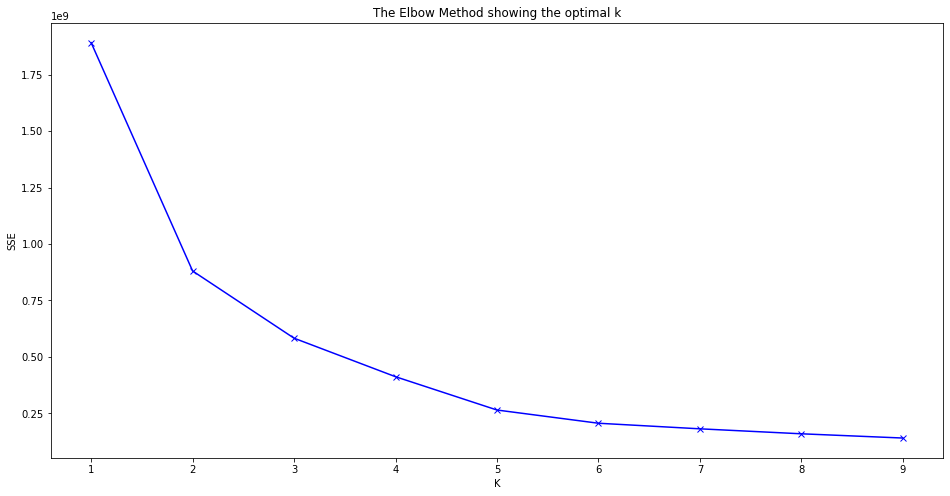

In [7]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
#Ploting the distortion of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
# computing K-Means with K = 5 (5 clusters)
kmeans= KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
centroids= kmeans.cluster_centers_

In [10]:
Cluster_details = [(name, cluster) for name, 
                   cluster in zip(Calc.index, kmeans.labels_)]
clusters = []
for i in range (0, 5):
    tmp = []
    for detail in Cluster_details:
        if detail[1] == i:
            tmp.append(detail[0])
    clusters.append(tmp)
for i in range(len(clusters)):
    print('Cluster ', i+1, '= ', clusters[i])

Cluster  1 =  []
Cluster  2 =  ['SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT', 'NASDAQ.AMD', 'NASDAQ.AMGN', 'NASDAQ.AMZN', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BBBY', 'NASDAQ.BIIB', 'NASDAQ.CA', 'NASDAQ.CBOE', 'NASDAQ.CELG', 'NASDAQ.CERN', 'NASDAQ.CHRW', 'NASDAQ.CHTR', 'NASDAQ.CINF', 'NASDAQ.CMCSA', 'NASDAQ.CME', 'NASDAQ.COST', 'NASDAQ.CSCO', 'NASDAQ.CSX', 'NASDAQ.CTAS', 'NASDAQ.CTSH', 'NASDAQ.CTXS', 'NASDAQ.DISCA', 'NASDAQ.DISCK', 'NASDAQ.DISH', 'NASDAQ.DLTR', 'NASDAQ.EA', 'NASDAQ.EBAY', 'NASDAQ.EQIX', 'NASDAQ.ESRX', 'NASDAQ.ETFC', 'NASDAQ.EXPD', 'NASDAQ.EXPE', 'NASDAQ.FAST', 'NASDAQ.FB', 'NASDAQ.FFIV', 'NASDAQ.FISV', 'NASDAQ.FITB', 'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.GILD', 'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.GRMN', 'NASDAQ.GT', 'NASDAQ.HAS', 'NASDAQ.HBAN', 'NASDAQ.HOLX', 'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.ILMN', 'NASDAQ.INCY', 'NASDAQ.INFO', 'NASDAQ.INTC', 'NASDAQ.INT